## Inverse Discrete Fourier Transform, iDFT
While the Discrete Time Fourier Transform transforms a signal from time domain to frequency domain, the inverse Discrete Time Fourier Transform takes the representation of the signal back to the time domain.

This script tests what the function numpy.fft.ifft computes.
https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html

**Note:** The input of the function should be ordered in the same way as is returned by fft.

It is shown that the function numpy.fft.ifft computes:

\begin{equation}
y_n = \frac{1}{N} \sum_{k=0}^{Ν-1} Y_k  e^{\frac{i 2\pi}{N} kn}
\end{equation}

where k = 0, 1, 2, ... N-1 and $Y_k$ is the DFT from numpy. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
params = {'legend.fontsize': 16,
          'axes.labelsize': 17,
          'xtick.labelsize': 17,
          'ytick.labelsize': 17}

plt.rc('text', usetex=False)
plt.rcParams.update(params)

#### 1) Create a signal
A sine wave with multpliple frequencies (1 Hz, 2 Hz and 4 Hz)

In [45]:
t = np.arange(0, 10, 0.01) # time period
N = len(t)
y = np.sin(2*np.pi*t) + np.sin(2*2*np.pi*t) + np.sin(4*2*np.pi*t)

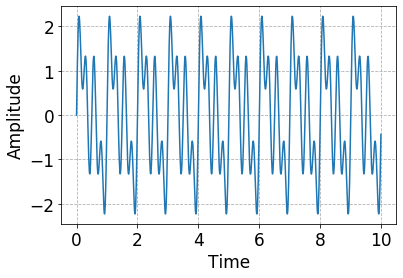

In [46]:
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--')

#### 2) Do a DFT on the signal

In [47]:
y_fft  = np.fft.fft(y)

#### 3) Do an inverse Fourier transform on the signal 

In [48]:
i_y_fft = np.fft.ifft(y_fft)

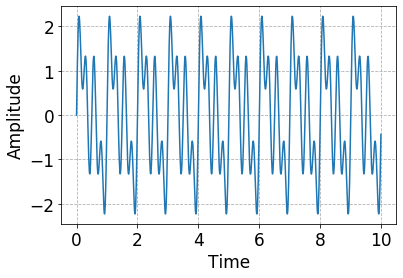

In [49]:
plt.plot(t, i_y_fft)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--')

#### 4) Plot the original sine wave along with the inverse Fourier transform

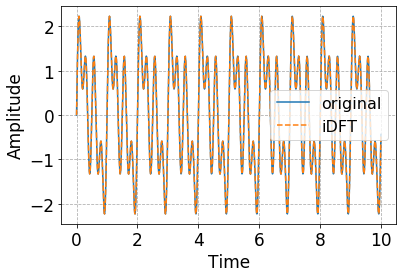

In [50]:
plt.plot(t, y, label='original')
plt.plot(t, i_y_fft, label='iDFT', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--')
plt.legend()

#### 5) Compute the inverse Discrete Fourier Transform manually

In [51]:
iDFT = lambda k : np.sum(y_fft*np.exp(1j*2*np.pi*k*np.arange(N)/N))/N

In [52]:
my_idft = [iDFT(k) for k in range(N)]

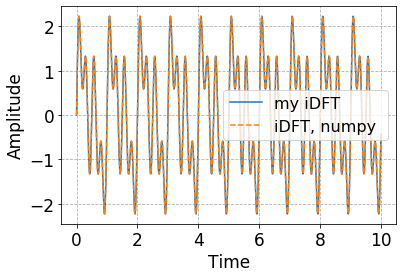

In [53]:
plt.plot(t, my_idft, label='my iDFT')
plt.plot(t, i_y_fft, label='iDFT, numpy ', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--')
plt.legend()

Therefore, the inverse DFT from numpy is:

\begin{equation}
y_n = \frac{1}{N} \sum_{k=0}^{Ν-1} Y_k  e^{\frac{i 2\pi}{N} kn}
\end{equation}

where k = 0, 1, 2, ... N-1.

$Y_k$ is the DFT from numpy. 